# Chapter 3: Probability and Information Theory

In [3]:
import numpy as np
import tensorflow as tf
import scipy as sp
import seaborn as sns

Probability theory is a mathematical framework for representing uncertain statements. It provides a means of quantifying uncertainty as well as axioms for deriving new uncertain statements. In artificial intelligence applications, we use probability theory in two major ways. First, the laws of probability tell us how AI systems should reason, so we design our algorithms to compute or approximate various expressions derived using probability theory. Second, we can use probability and statistics to theoretically analyze the behaviour of proposed AI systems.

## 3.1 Why Probability?

Machine learning must always deal with uncertain quantities and sometimes stochastic (nondeterministic) quantities. Uncertainty and stochasticity can arise from many sources. There are three possible sources of uncertainty:

  1. **Inherent stochasticity in the system being modeled**. For example, most interpretations of quantum mechanics describe the dynamics of subatomic particles as being probabilistic. We can also create theoretical scenarios that we postulate to have random dynamics, such as the hypothetical card game where we assume that the cards are truly shuffled into a random order.
  2. **Incomplete observability**. Even deterministic systems can appear stochastic when we cannot observe all variables that drive the behavior of the system. For example, in the Monty Hall problem, a game show contestant is asked to choose between three doors and wins a prize behind the chosen door. Two doors lead to a goat while a third leads to a car. The outcome given the contestant's choice is deterministic, but from the contestant's point of view, the outcome is uncertain.
  3. **Incomplete modelling**. When we use a model that must discard some of the information we have observed, the discarded information results in uncertainty in the model's predictions. For example, suppose we build a robot that can exactly observe the location of every object around it. If the robot discretizes space when predicting the future location of these objects, then the discretization makes the robot immediately become uncertain about the precise position of objects: each object could be anywhere within the discrete cell it was observed to occupy.
  
In many cases, it is more practical to use a simple but uncertain rule than a complex but certain one, even if the true rule is deterministic and our modeling systems has the fidelity to accomodate a complex rule.

Probability theory was originally developed to analyze the frequency of vents. It is easy to see how probability theory can be used to study events like drawing of a certain hand of cards in a poker game. These kinds of events are often repeatable. When we say an outcome has a probability $p$ of occuring, it means that if we repeated the experiment (e.g. drawing a hand of cards) infinitely many times, then proportion $p$ of the repetitions would result in that outcome. This kind of reasoning does not seem immediately applicable to propositions that are not repeatable. If a doctor analyzes a patient and says that the patient has a 40 percent chance of having the flu, this means something very different - we cannot make infinitely many replicas of the parient, nor is there any reason to believe that different replicas of the patient would present with the same symptoms yet have carying underlying conditions. In the case of the doctor diagnosing the patient, we use probability to represent a **degree of belief**, with 1 representing a bsolute certainty that the patient has the flu and 0 indicating absolute certainty that the patient does not have the flue. The former king od probability, related directly to the rates at which events occur, is known as **frequentist probability**, while the latter, related to qualitative levels of certainty, is known as **Bayesian probability**.

## 3.2 Random Variables

A **random variable** is a variable that can take on different values randomly. We typically denote the random variable itself with a locercase letter in plain typeface and the values it can take on with lowercase script letters. For example, $x_{1}$ and $x_{2}$ are both possible values that the random variable x can take on. For vector-values variables, we would write the random variable as **x** and ones of its values as $\boldsymbol{x}$. On its own, a random variable is just a description of the states that are possible; it must be coupled with a probability distribution that specifies how likely each of these states are.

## 3.3 Probability Distributions

A **probability distribution** is the decription of how likely a random variable or set of random variables is to take on each of its possible states. The way we describe probability distributions depends on whether the variables are discrete or continuous.

### 3.3.1 Discrete Variable and Probability Mass Functions

A probability distribution over discrete variables may be described using a **probability mass functions** (PMF). We typically denote probability mass functions with a capital $P$. Often we associate each random variable with a different probability mass funtion and the reader must infer which PMF to used based on the identity of the random variable rather than on the name of the function: $P(x)$ is usually not the same as $P(y)$.

The probability mass function maps from a state of a random variable to the probability of that random variable taking on that state. The probability that x = $x$ is denoted as $P(x)$ with probability of 1 indicating that x = $x$ is certain and a probability of 0 indicating that x = $x$ is impossible. Sometimes to disambiguate which PMF to use, we write the name of the random variable explicitly: $P(\text{x} = x)$. Sometimes we define a variable first, the use ~ notation to specify which distribution it follows later: $\text{x} \text{~} P(\text{x})$.

Probability mass functions can act on many variables at the same time. Such a probability distribution over many variables is known as a **joint probability distribution**. $P(\text{x} = x, \text{y} = y)$ denotes the probability that $\text{x} = x$ and $\text{y} = y$ simultaneously. We may also write $P(x, y)$ for brevity.

To be a PMF on a random variable x, a function $P$ must satisfy the following properties:

  1. The domain of $P$ must be the set of all possible states of $\text{x}$.
  2. $\forall x \in \text{x}, 0 \leq P(x) \leq 1$. An impossible event has probability 0, and no state can be less than that. Likewise, an event that is guaranteed to happen has probability 1, and no state can have a greater chance of occuring.
  3. $\sum_{x\in \text{x}} P(x) = 1$. We refer to this property as being **normalized**. Withoutt his property, we could obtain probabilities greater than one by computing the probability of one of many events occurring.
  
For example, consider a single discrete random variable $\text{x}$ with $k$ different states. We can place a **uniform distribution** on $\text{x}$ - that is, make each of its states equally likely - by setting its PMF to $P(\text{x} = x_{i}) = \frac{1}{k}$ for all $i$.

We can see that this fits the requirements for a probability mass function. The value $\frac{1}{k}$ is positive because $k$ is a positive integer. We also see that $\sum_{i} P(\text{x} = x_{i}) = \sum_{i} \frac{1}{k} = \frac{k}{k} = 1$, so the distribution is properly normalized. 

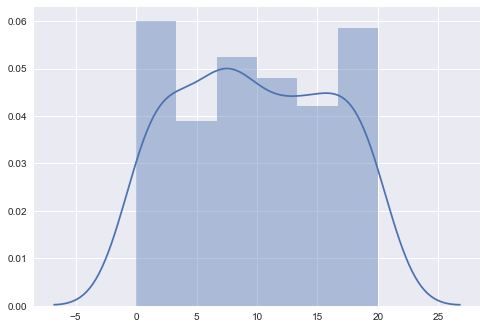

In [21]:
# draw 200 random samples from a uniform distribution over the range [0,21) generated by numpy and plot
samples = np.random.randint(low=0, high=21, size=200)  # if we change the size parameter to take greater inputs, we see the shape of the plot converge to a box shape
sns.distplot(samples)
plt.show()

### 3.3.2 Continuous Variable and Probability Density Functions

When working with continuous random variables, we describe probability distributions using a **probability density function** (PDF) rather than a probability mass function. To be a probability density function, a function $p$ must satisfy the following properties:

  1. The domain of $p$ must be the set of all possible states of $\text{x}$.
  2. $\forall x \in \text{x}, p(x) \geq 0$. Note that we do not require $p(x) \leq 1$.
  3. $\int p(x)dx = 1$.

A probability density function $p(x)$ does not give the probability of a specific state directly; instead the probability of landing inside an infinitesimal region with volume $\delta x$ is given by $p(x)\delta x$.

We can integrate the density function to find the actual probability mass of a set of points. Specifically, the probability that $x$ lies in some set $\mathbb{S}$ is given by the integral of $p(x)$ over that set. In the univariate example, the probability that $x$ lies in the interval $[a, b]$ is given by $\int_{[a, b]}p(x)dx$.

For an example of a PDF corresponding to a specific probability density over a continuous random variable, consider a uniform distribution on an interval of the real numbers. We can do this with a function $u(x; a, b)$ where $a$ and $b$ are the endpoints of the interval, with $b > a$. The ";" notation means "parametrized by"; we consider $x$ to be the argument of the function, while $a$ and $b$ are parameters that define the function. To ensure that there is no probability mass outside the interval, we say $u(x; a, b) = 0$ for all $x \notin [a, b]$. Within $[a, b],\: u (x; a, b) = \frac{1}{b-a}$. We can see that this is non-negative everywhere. Additionally, it integrates to 1. We often denote that $x$ follows the uniform distribution on $[a, b]$ by writing $x$ ~ $U(a, b)$.

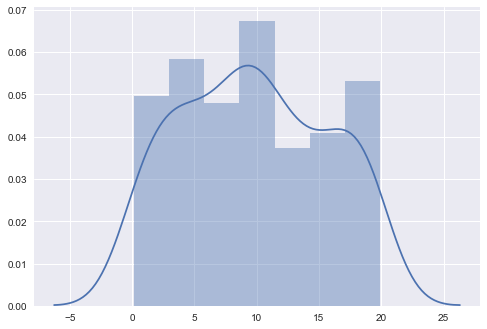

In [26]:
# draw 200 random samples from a uniform distribution over the range [0,21) generated by numpy and plot
samples = np.random.uniform(low=0.0, high=20.0, size=200)  # if we change the size parameter to take greater inputs, we see the shape of the plot converge to a box shape
sns.distplot(samples)
plt.show()

## 3.4 Marginal Probability

Sometimes we know the probability distribution over a set of variables and we want to know the probability distribution over just a subset of them. The probability distribution over the subset is known as the **marginal probability distribution**. 

For example, suppose we have discrete random variables x and y, and we know $P(x, y)$. We can find $P(x)$ with the **sum rule**: $\forall x \in \text{x}, P(\text{x} = x) = \sum_{t} P(\text{x} = x, \text{y} = y)$.

The name "marginal probability" comes from the process of computing marginal probabilities on paper. When the values of $P(x, t)$ are written in a grid with different values of $x$ in rows and different values of $y$, it is natural to sum across the row of the grind, then write $P(x)$ in the margin of the paper just to the right of the row.

For continuous variables, we need to use integration instead of instead of summation: $p(x) = \int \: p(x, y)dy$.

## 3.5 Conditional Probability

In many cases, we are interested in the probability of some event, given that some other event has happened. This is called a **conditional probability**. We denote the probability that $\text{y} = y$ given $\text{x} = x$ as $P(\text{y} = y \: | \: \text{x} = x)$. This is a conditional probability that can be computed with the formula

$P(\text{y} = y \: | \: \text{x} = x) = \frac{P(\text{y} = y, \text{x} = x)}{P(\text{x} = x)}$.

The conditional probability is only defined when $P(\text{x} = x) > 0$. We cannot compute the conditional probability conditioned on an event that never happens.

## 3.6 The Chain Rule of Conditional Probabilities

Any joint probability distribution of many random variables may be decomposed into conditional distributions over only one variable: $P(x^{(1)},...,x^{(n)}) = P(x^{(1)})\prod_{i=2}^{n}P(x^{(1)},...,x^{(i-1)})$.

This observation is known as the **chain rule**, or **product rule**, of probability. It follows immediately from the definition of conditional probability given above.

For example, applying the definition twice, we get

  $P(a, b, c) = P(a \: | \: b, c)P(b, c) \\
  P(b, c) = P(b \: | \: c)P(c) \\
  P(a, b, c) = P(a \: | \: b, c)P(b \: | \: c)P(c)$
  

## 3.7 Independence and Conditional Independence

Two random variables x and y are **independent** if their probability distribution can be expressed as a product of two factors, one involving only x and one involving only y: $\forall x \in x, y, \in y, p(x = x, y = y) = p(x = x)p(y=y)$. 

Two random variables x and y are **conditionally independent** given a random variable x if the conditional probability distribution over x and y factorizes in this way for every value of z: $\forall x \in x, y \in y, z \in z, \: p(x = x, y = y \: | \: z = z) = p(x = x \: | \: z = z)p(y=y \: | \: z=z)$.

## 3.8 Expectation, Variance, and Covariance

The **expectation** or **expected value** of some function $f(x)$ with respect to the probability distribution $P(x)$ is the average, or mean value, that $f$ takes on when $x$ is drawn from $P$. For discrete variables this can be computed with the summation: 

$\quad \quad \quad \quad \quad \mathbb{E}_{x \sim P} [f(x)] = \sum_{x} P(x)f(x)$

while for continuous variables, it is computed with an integral:

$\quad \quad \quad \quad \quad \mathbb{E}_{x \sim P} [f(x)] = \int P(x)f(x)dx$

The **variance** give a measure of how much the value of a function of a random variable x cary as we sample different values of x from its probability distribution:

$\quad \quad \quad \quad \quad Var(f(x)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]$

When the variance is low, the values of $f(x)$ cluster near their expected value. The square root of the variance is known as the **standard deviation**.